# Designing a crooked dataset

In [3]:
%matplotlib inline

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
N = 200
M = 4
sc = 0.6
roots = np.linspace(-1 / sc, 1. / sc, M)
xlim = [-1.5, 1.5]
ylim = [-3, 3]
def poly(beta, x):
    m = len(beta)
    monomials = x**np.arange(m)
    return beta @ monomials
def poly_roots(roots, x):
    return np.prod(x - roots) + x

In [370]:
x = np.sort(np.random.randn(N))
eps = np.random.randn(N)
fx = np.array([poly_roots(roots, x[i]) for i in range(len(x))])
ok = (fx > ylim[0]) & (fx < ylim[1])
x = x[ok]
fx = fx[ok]

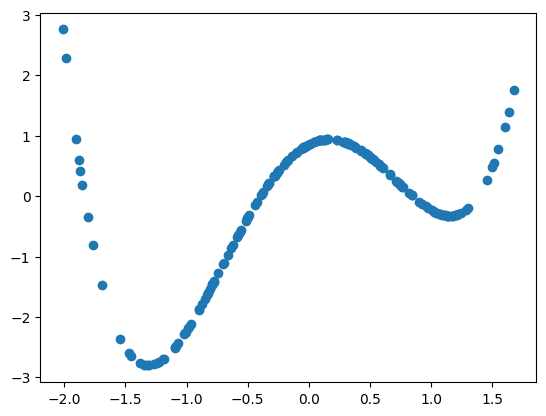

In [371]:
plt.scatter(x, fx)

In [642]:
def grade_per_pint(p):
    rp = (p/3-1.25)
    a = -2
    b = 0
    c = 3
    return a*rp**2 + b*rp + c

np.random.seed(4021566)

def sample(N=100, Nswitch=80):
    samples = np.empty((4, N))
    age = np.round(np.random.uniform(17, 32, size=(N,)))
    
    workhours = np.round(np.random.normal(5,2, size=(N,)), decimals=2)
    workhours[workhours>20] = 20
    workhours[workhours<0] = 0
    
    #x = -3*(workhours/np.max(workhours)-0)
    #pints = 2*np.array([poly_roots(roots, x[i])+2.5 for i in range(len(x))])
    x = -3.5*(workhours/np.max(workhours)-0.5)
    pints = 2*np.array([poly_roots(roots, x[i])+3 for i in range(len(x))])
    pints += 2*np.random.normal(size=pints.shape)
    pints[pints<0] = 0
    pints[pints>13] = 13
    
    #pints = .25 * np.ceil(pints/.25)
    #pints = np.round(pints, decimals=0)
    
    grade = 4*np.ones(pints.shape)
    #grade += 0.5*sleephours - (sleephours >= 10)*sleephours*.3 - (sleephours<4)*2*sleephours
    #for ip, p in enumerate(pints):
    #    grade[ip] += -int(p>=4)*np.random.uniform(3,6)*p + int(p<4 and p>=2)*np.random.uniform(3,6)
    grade += grade_per_pint(pints)   
    factors = np.ones(workhours.shape)*2
    factors[workhours>6] = 4
    #grade += 2*workhours
    grade += workhours*factors
    grade = 0.82*grade

    grade[grade < 0] = 0
    grade[grade > 20] = 20
    grade = np.round(grade, decimals=2)
    samples[0,:] = age
    samples[1,:] = workhours
    samples[2,:] = pints
    samples[3,:] = grade
    
    return samples

In [643]:
N = 50
rat = 0.84
all_samps = sample(N, int(N*rat))

In [644]:
import seaborn as sns
import pandas as pd

In [645]:
df = pd.DataFrame(all_samps.T, columns=['age', 'workhours', 'pint', 'grade'])
df[4] = [0]*int(N*rat)+[1]*int((1-rat)*N)

In [646]:
df

,age,workhours,pint,grade,4
0,24.0,4.49,5.059112,12.79,0
1,22.0,3.81,7.417147,9.54,0
2,27.0,9.78,3.545652,20.00,0
3,20.0,4.68,10.267364,5.68,0
4,21.0,5.37,8.177050,10.98,0
5,31.0,4.30,12.669072,0.00,0
6,21.0,4.51,8.680614,8.71,0
7,29.0,5.31,9.398609,8.63,0
8,25.0,2.04,2.706037,8.89,0
9,17.0,3.49,9.233669,5.98,0


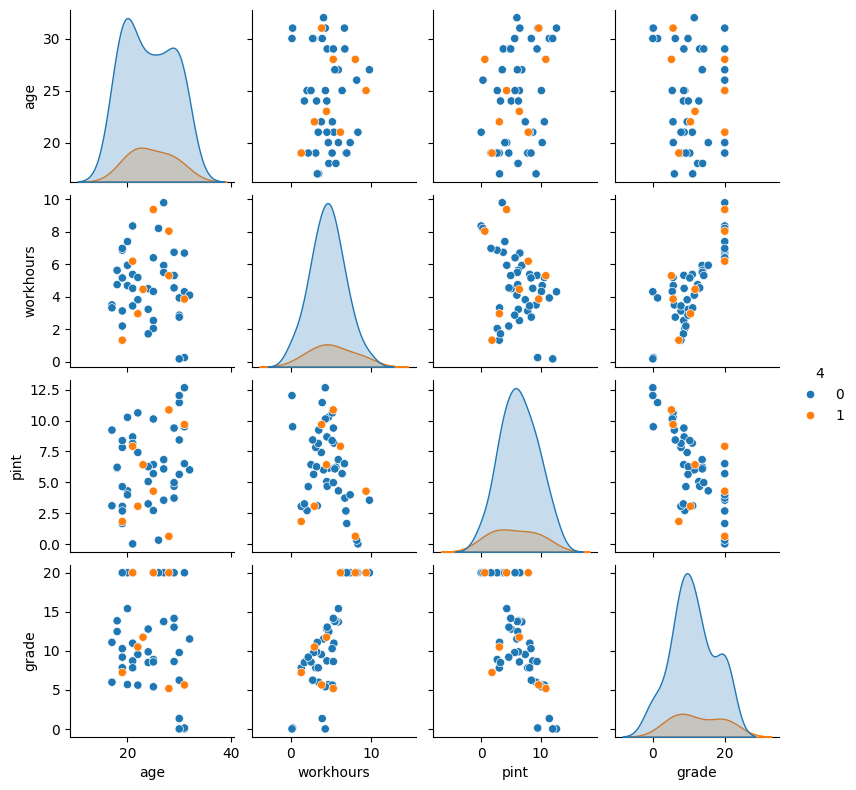

<Figure size 858.875x800 with 0 Axes>

In [647]:
from IPython.display import Image
import seaborn as sns
import matplotlib.pyplot as plt 

sns_plot = sns.pairplot(df, height=2.0, hue=4)
sns_plot.savefig("pairplot.png")

plt.clf() # Clean parirplot figure from sns 
Image(filename='pairplot.png') # Show pairplot as image


In [648]:
np.save("dataset.npy", all_samps.T)

In [649]:
more_samps = sample(500, int(N*rat))

In [650]:
np.save("full_ds.npy", more_samps.T)

In [651]:
def create_real_pint_ds(ds):
    workhours = ds[1,:]
    workhours = np.sort(workhours)
    x = -3.5*(workhours/np.max(workhours)-0.5)
    pints = 2*np.array([poly_roots(roots, x[i])+3 for i in range(len(x))])
    pints[pints<0] = 0
    pints[pints>10] = 10

    return workhours, pints


In [652]:
real_pints = create_real_pint_ds(all_samps)

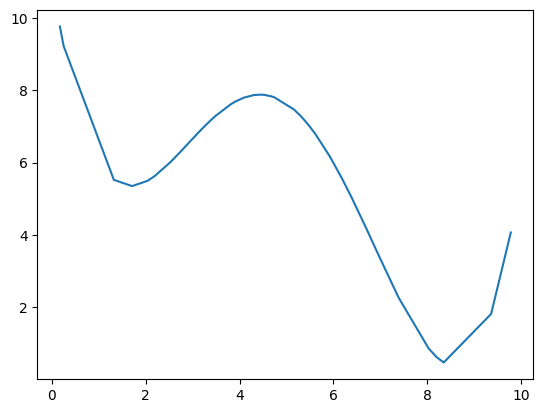

In [653]:
plt.plot(*real_pints)

In [654]:
np.save('real_pint_data.npy', real_pints)

# Practical

It's exam season ! We collected samples from 200 students that had a free day before their last exam and some decided to throw a party.

<div class="alert alert-block alert-info">
Load the dataset, it contains datas on 200 "students" : their age, number of hours they worked, number of pints they had the night before and final grade (0-20).

Before going further, back to the basics : compute the minimum, maximum and mean of each column.

In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
ds = np.load("dataset.npy")

columns_names = ['age', 'hours', 'pints', 'grade']

for i in range(ds.shape[1]):
    print(f"{columns_names[i]} : from {ds[:,i].min()} to {ds[:,i].max()} (avg: {ds[:,i].mean()})")

age : from 17.0 to 32.0 (avg: 24.18)
hours : from 0.17 to 9.78 (avg: 4.6766)
pints : from 0.0 to 12.66907170802699 (avg: 6.210320766222847)
grade : from 0.0 to 20.0 (avg: 11.3764)


# A tale of prediction

Machine learning is mostly used to predict the output of a given system provided a known input. The prediction itself can take different forms,
require more or less postprocessing to be usable, but in the end, it's a guess.

<div class="alert alert-block alert-info">
To explore a bit this world, let's turn to the dataset and check the link between the number of hours worked and the number of pints...
Plot the former against the latter, it's always a good idea to visualize your data.
</div>

<div class="alert alert-block alert-warning">
Note that there's no reason the samples would be correctly ordered, so it's probably better to use <code>plt.scatter</code> instead of <code>plt.plot</code>. An insteresting representation trick when you might have overlapping data points is to use the <code>alpha</code> parameter to make the plot translucent and better visualize possible clusters (<code>alpha=0.2</code> should work alright).
</div>

In [10]:
age = ds[:,0]
hours = ds[:,1]
pints = ds[:,2]
grade = ds[:,3]

Text(0, 0.5, 'pints')

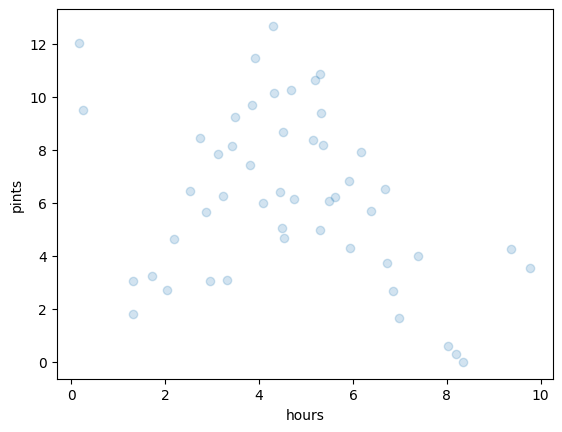

In [11]:
fig, ax = plt.subplots()
ax.scatter(hours,pints, alpha=0.2)
ax.set_xlabel('hours')
ax.set_ylabel('pints')

Let's try to build a model to represent that relationship

<div class="alert alert-block alert-success">
A <b>model</b> is an idealized representation of reality. The goal is to capture the <b>essential behaviour</b> and discard noise effects.

Here, we could try a 1- or 2-parameter model (constant or linear with an intercept). If we go down this path, we already know that we will not capture all of the observations. To determine the parameters
We can do that in 3 different ways:

- Compute the Least Mean Squares regresssion using the formula $M^TM p = M^T y$ with $p = [a_N, a_{N-1},\ldots,a_1,a_0]$ the vector of coefficients and $M = [x^N|x^{N_1}|\ldots|x|1]$ and $(x, y)$ are input/output **vectors**
- Use numpy's ``polyfit`` function
- Use ``sklearn`` LinearRegressor class

<div class="alert alert-block alert-info">
    Try a 3-parameter polynomial fit on the proposed data (<code>numpy.polyfit</code>). Plot the result against the data<br/>
What can you observe ?

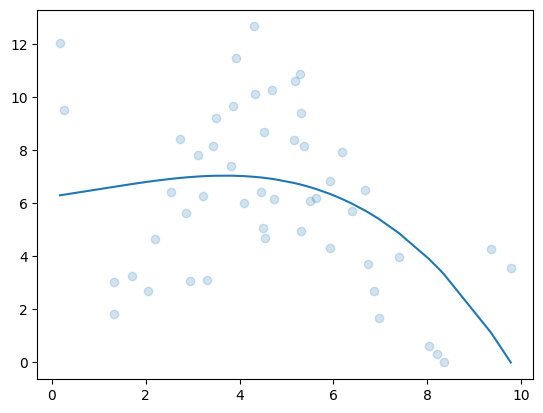

In [659]:

coefs  = np.polyfit(hours, pints, 3)
sorted_hours = np.sort(hours)

fig, ax = plt.subplots()
ax.scatter(hours, pints, alpha=.2)
ax.plot(sorted_hours, np.poly1d(coefs)(sorted_hours))

It looks like we're missing parts of the events

<div class="alert alert-block alert-success">
This is typical from <b>Underfitting</b> :<ul>
    <li>The model is too simple to accurately represent the data</li>
    <li>It doesn't capture noise but misses information</li>
</ul>
</div>

<div class="alert alert-block alert-info">
Try increasing the polynomial degree to 3, 4 or 10 to fit data better.

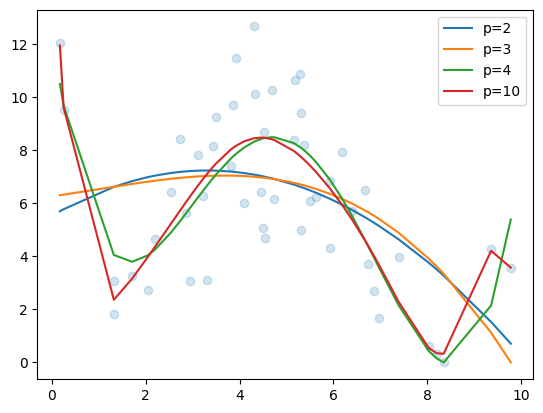

In [795]:
orders =[2, 3, 4, 10]
coefs = [np.polyfit(hours, pints, i) for i in orders]
sorted_hours = np.sort(hours)

fig, ax = plt.subplots()
ax.scatter(hours, pints, alpha=.2)
for i, co in enumerate(coefs):
    ax.plot(sorted_hours, np.poly1d(co)(sorted_hours), c=f'C{i}', label=f'p={orders[i]}')

ax.legend()

Hum... this time, we see some improvement. The model seems to somewhat capture the data for a polynomial of degree 4.
Between a 4th order and a 10th order polynomial, there's no much improvement though. So, what should we use ?

## How close from the "truth" ?

Here, we're playing with simulated data, the "ground truth" is known.

<div class="alert alert-block alert-info">
Load the <code>real_pint_data</code> file and plot it alongside the previous fits, it contains denoised data and will show us what the actual phenomenon looks like.

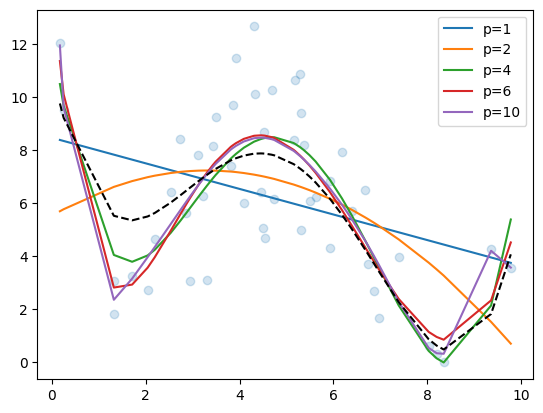

In [796]:
ground_truth = np.load("real_pint_data.npy")

orders =[1, 2, 4, 6, 10]
coefs = [np.polyfit(hours, pints, i) for i in orders]
sorted_hours = np.sort(hours)

fig, ax = plt.subplots()
ax.scatter(hours, pints, alpha=.2)
for i, co in enumerate(coefs):
    ax.plot(sorted_hours, np.poly1d(co)(sorted_hours), c=f'C{i}', label=f'p={orders[i]}')
ax.plot(*ground_truth, 'k--')
ax.legend()

OK so it seems that a 4th order fit is enough here... 

<div class="alert alert-block alert-success">
    Higher order models might be OK  at first sight but they do have an inherent issue : <b>they overfit</b>.
That means:
    <ul>
        <li>the large number of parameters allow them to fit the proposed data <i>too well</i> and they capture noise</li>
        <li>they are not able to <b>generalize</b> : if presented new inputs, they won't be able to  correctly predict an output.</li>
    </ul>


Note that there's always a model large enough to perfectly match all presented datapoints

## Generalization, prediction accuracy

Let's try to measure the accuracy of our prediction.
The easy way to do that is to compute an error measure on the predicted data vs real data.

$$\epsilon = \frac{1}{N}\sum_i L(y_i, f(x_i))$$

with the model $f$ linking input $x_i$ to a prediction that must be compared to the observed data $y_i$ through a "distance" $L$.

Let's use the squared error : $L(y_{true}, y_{pred}) = (y_{true} - y_{pred})^2$

<div class="alert alert-block alert-info">
Compute the error for the different polynomial orders we tried, plot a graph of the error versus the polynomial degree.

In [797]:
orders =[2, 4, 6, 10]
coefs = [np.polyfit(hours, pints, i) for i in orders]

def MSE(x, y, model):
    return 1/len(x)*np.sum((y-model(x))**2)

errors = [MSE(hours, pints, np.poly1d(coefs[i]))for i in range(len(orders))]

Text(0, 0.5, 'MSE')

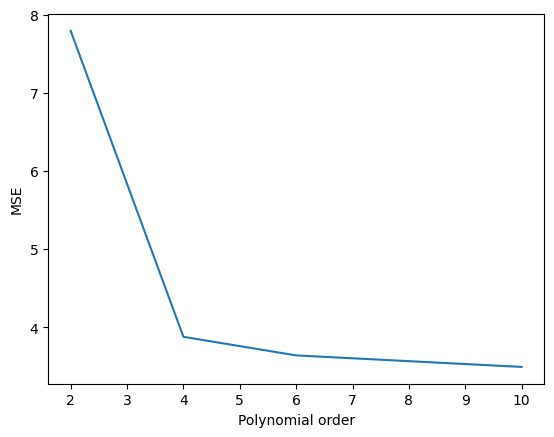

In [798]:
fig, ax = plt.subplots()
ax.plot(orders, errors)
ax.set_xlabel('Polynomial order')
ax.set_ylabel('MSE')

This error we computed is called the *train* error, because it is the error observed between the developped model and the data we use to adjust it.

In terms of machine learning, what we're actually looking for is not just to correctly approximate a set of observations but also to be able to handle information that we've never seen before.

<div class="alert alert-block alert-info">
Let's extend the example to a larger dataset. We have the records of 1000 students in the file <code>full_ds</code>. Load it, plot the scatter of the work hours/pints relationship and use your models trained on 200 points to match the 1000 points. If the model is correct, it should generalize.

In [664]:
fullds = np.load('full_ds.npy')
age1k = fullds[:,0]
hours1k = fullds[:,1]
pints1k = fullds[:,2]
grade1k = fullds[:,3]

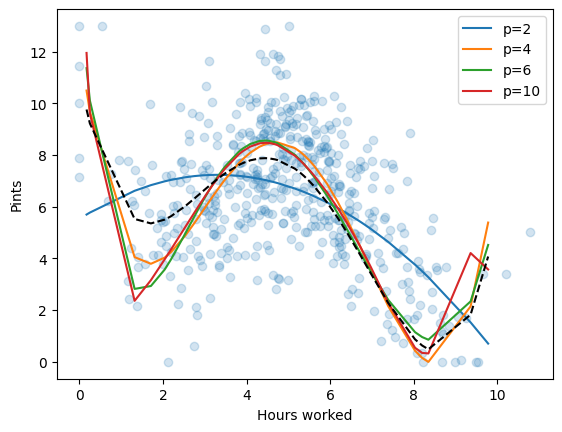

In [772]:
orders =[2, 4, 6, 10]
coefs = [np.polyfit(hours, pints, i) for i in orders]

fig, ax = plt.subplots()
ax.scatter(hours1k, pints1k, alpha=.2)
for i, co in enumerate(coefs):
    ax.plot(sorted_hours, np.poly1d(co)(sorted_hours), c=f'C{i}', label=f'p={orders[i]}')
ax.plot(*ground_truth, 'k--')
ax.set_xlabel('Hours worked')
ax.set_ylabel('Pints')
ax.legend()

Let's plot the evolution of the error on the large dataset with increasing polynomial degree. For the sake of getting a nice graph, retrain your polynomial models for degrees going from 0 to 8 and recompute the errors.

In [774]:
orders = np.arange(0, 8)
coefs = [np.polyfit(hours, pints, i) for i in orders]
errors = [MSE(hours, pints, np.poly1d(coefs[i]))for i in range(len(orders))]
errors1k = [MSE(hours1k, pints1k, np.poly1d(coefs[i]))for i in range(len(orders))]

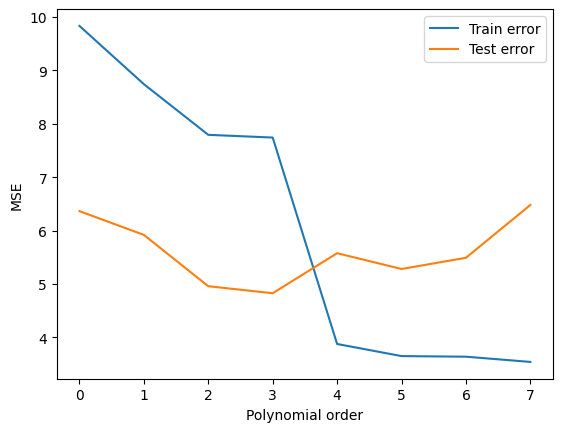

In [777]:
fig, ax = plt.subplots()
ax.plot(orders, errors, label='Train error')
ax.plot(orders, errors1k, label='Test error')
ax.set_xlabel('Polynomial order')
ax.set_ylabel('MSE')
ax.legend()

For each model there's a sweet spot and this graph is perfect to find it. The model is optimal when the test error is at a minimum and usually it is just after a drop in the train error.

<div class="alert alert-block alert-info">
Let's play some more with this by changing how many of the records we use to train the regressions. We'll keep p=4, join the two datasets together and take 10%, 20%, 30% etc... of this dataset to train and the rest to evaluate the quality of the training.
</div>

<div class="alert alert-block alert-warning">
There's a useful function to do that in scikit-learn : <code>sklearn.model_selection.train_test_split</code>

In [776]:
from sklearn.model_selection import train_test_split

allpints = np.concatenate([pints, pints1k])
allhours = np.concatenate([hours, hours1k])

train_error = []
test_error = []
ratios = np.arange(0.1,1,0.1)
for r in ratios:
    xtr, xte, ytr, yte = train_test_split(allhours, allpints, train_size=r, shuffle=False)
    fitted_model = np.poly1d(np.polyfit(xtr, ytr, 4))
    train_error.append(MSE(xtr, ytr, fitted_model))
    test_error.append(MSE(xte, yte, fitted_model))


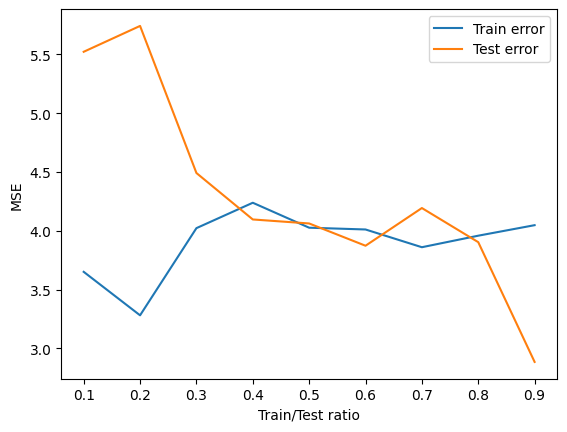

In [778]:
fig, ax = plt.subplots()
ax.plot(ratios, train_error, label='Train error')
ax.plot(ratios, test_error, label='Test error')
ax.set_xlabel('Train/Test ratio')
ax.set_ylabel('MSE')
ax.legend()

# Looking at the full dataset

Let's stop focusing on that hours/pint relationship and go towards the full dataset.

You've seen how even linear models can manage to represent complex links between features. Now, how to predict the grade based on the other columns ?

Scikit-learn is a very complete toolbox for all sorts of data processing and machine learning tasks (it even has simple neural nets to do some preliminary analyses).
    
In the follow up, we'll stick to this linear models but using a built-in regressor based on Stochastic Gradient Descent. You'll find this term again in the Neural Net realm as it is a rather efficient optimisation strategy.

<div class="alert alert-block alert-info">
From <code>sklearn.linear_model</code>, import and instantiate a <code>SGDRegressor</code> object.

In [780]:
from sklearn import linear_model

In [781]:
sg = linear_model.SGDRegressor()

<div class="alert alert-block alert-info">Join the age, hours and pints vectors into a matrix, 1 sample per row.

In [783]:
inputs = np.vstack((age, hours, pints)).T

<div class="alert alert-block alert-info">Use the method <code>fit</code> of the regressor to learn from the inputs/grade couples.

In [785]:
sg.fit(inputs, grade)

,loss,'squared_error'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0
,epsilon,0.1
,random_state,None


<div class="alert alert-block alert-info">Join the age, hours and pints vectors of the 1k sample dataset the same way and pass it to the <code>predict</code> method

In [706]:
predicted_grade = sg.predict(np.vstack((age1k, hours1k, pints1k)).T)

<div class="alert alert-block alert-info">Plot a scatter of the predicted_grade versus the actual grades from the 1k sample dataset. If your regression worked well, the points should align on the $x=y$ line

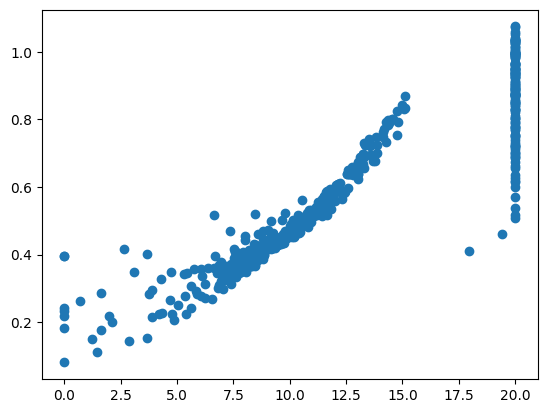

In [786]:
fig, ax = plt.subplots()
ax.scatter(grade1k, predicted_grade )

Hmmm... You don't have to believe me right away but I tell you : this dataset is linearly separable, so this should work. What is wrong then ?

<div class="alert alert-block alert-warning">It is always a good idea to normalize your inputs and outputs when dealing with data.</div>

<div class="alert alert-block alert-info">Using the <code>StandardScaler</code> and <code>MinMaxScaler</code> from <code>sklearn.preprocessing</code> transform your input and output data both for the training and testing datasets.<div class="alert alert-block alert-info">Join the age, hours and pints vectors into a matrix, 1 sample per row.

In [787]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [788]:
train_dataset = np.vstack((age, hours, pints)).T
test_dataset = np.vstack((age1k, hours1k, pints1k)).T

In [789]:
input_scaler = StandardScaler().fit(train_dataset)

In [790]:
output_scaler = MinMaxScaler().fit(np.array([[0,20]]).T)

In [791]:
# scale it all
scaled_train_in = input_scaler.transform(train_dataset)
scaled_train_out = output_scaler.transform(grade.reshape(-1,1))

scaled_test_in = input_scaler.transform(test_dataset)
scaled_test_out = output_scaler.transform(grade1k.reshape(-1,1))

<div class="alert alert-block alert-info">Retrain a <code>SGDRegressor</code> on the normalized data and draw the same scatter plot as before. What can you conclude ?

In [723]:
sg = linear_model.SGDRegressor()
sg.fit(scaled_train_in, scaled_train_out.reshape(-1,))


,loss,'squared_error'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0
,epsilon,0.1
,random_state,None


In [724]:
predicted_grade = sg.predict(scaled_test_in)

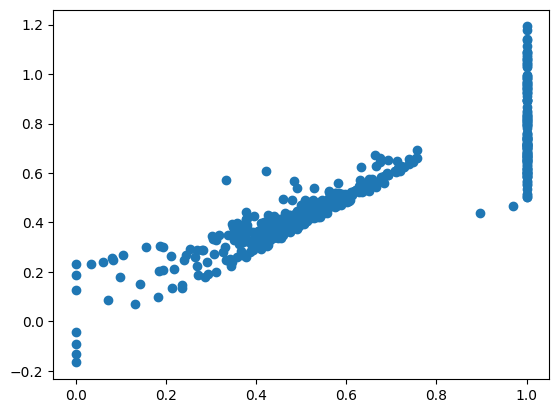

In [725]:
fig, ax = plt.subplots()
ax.scatter(scaled_test_out, predicted_grade)

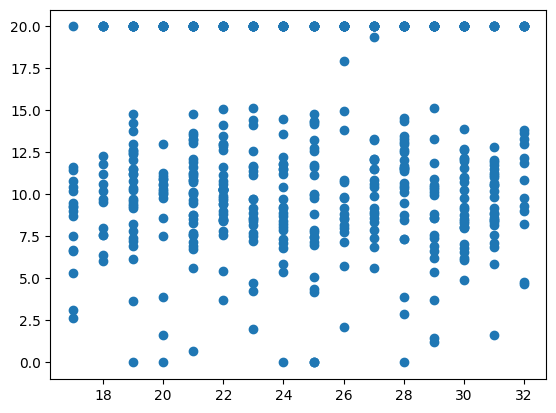

In [727]:
fig, ax = plt.subplots()
ax.scatter(age1k, grade1k)

<div class="alert alert-block alert-info">Some samples are still out of the line, look into scikit-learn documentation and the previous work on the hours/pint relationship to find a way to match these anyway.

In [735]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.svm import SVR

In [736]:
train_dataset = np.vstack((age, hours, pints)).T
test_dataset = np.vstack((age1k, hours1k, pints1k)).T

In [737]:
input_scaler = StandardScaler().fit(train_dataset)

In [738]:
output_scaler = MinMaxScaler().fit(np.array([[0,20]]).T)

In [739]:
# scale it all
scaled_train_in = input_scaler.transform(train_dataset)
scaled_train_out = output_scaler.transform(grade.reshape(-1,1))

scaled_test_in = input_scaler.transform(test_dataset)
scaled_test_out = output_scaler.transform(grade1k.reshape(-1,1))

In [753]:
svr = SVR(kernel='rbf', C=0.2, epsilon=0.05)
svr.fit(scaled_train_in, scaled_train_out.reshape(-1,))


,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,tol,0.001
,C,0.2
,epsilon,0.05
,shrinking,True
,cache_size,200
,verbose,False
,max_iter,-1


In [754]:
predicted_grade = svr.predict(scaled_test_in)

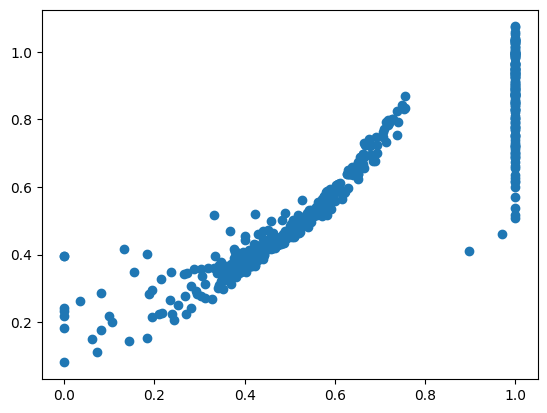

In [755]:
fig, ax = plt.subplots()
ax.scatter(scaled_test_out, predicted_grade)

(0.0, 20.0)

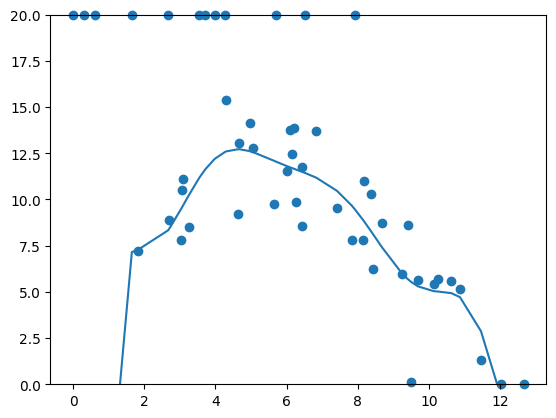

In [746]:
P = 9
fig, ax = plt.subplots()
ax.scatter(pints, grade, clip_on=False)

mask = grade!=20

coefs = np.polyfit(pints[mask], grade[mask], deg=P)
sorted_pints = np.sort(pints)
ax.plot(sorted_pints, np.poly1d(coefs)(sorted_pints))
ax.set_ylim([grade.min(), grade.max()])
